In [177]:
import pandas as pd
import numpy as np
from os import path
import seaborn as sb
import matplotlib.pyplot as plt

def plot_cell(track,
              x='Time',y='Cell volume',
              colors='Cell type'):
    sb.lineplot(track,x=x,y=y,hue=colors)


In [178]:
dataset_dir = '/Users/xies/Library/CloudStorage/OneDrive-Stanford/Skin/Mesa et al/Lineage models/Dataset pickles'
all_df = pd.read_pickle(path.join(dataset_dir,f'all_df.pkl'))

basals = pd.read_pickle(path.join(dataset_dir,f'basals.pkl'))

all_df['Region','Meta'] = [f[0] for f in all_df.index.get_level_values(1).str.split('_',expand=True)]
# all_df['TrackID','Meta'] = [f[1] for f in all_df.index.get_level_values(1).str.split('_',expand=True)]
all_df_g1 = all_df[all_df['Cell cycle phase','Meta'] == 'G1']
basals_g1 = all_df_g1[all_df_g1['Cell type','Meta'] == 'Basal']

/var/folders/zp/5k1kvm9j0t19cvq8h628kr8h0000gn/T/ipykernel_52751/4066138223.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_df['Region','Meta'] = [f[0] for f in all_df.index.get_level_values(1).str.split('_',expand=True)]


In [179]:
basals_g1

Name                index Nuclear volume Nuclear solidity           Z  \
Metadata      Measurement    Measurement      Measurement Measurement   
Frame TrackID                                                           
0     R1_1            0.0       122.9375         0.866902   41.884596   
      R1_5            2.0       209.8750         0.911509   44.379690   
      R1_8            3.0       117.9375         0.864011   51.314785   
      R1_11           4.0       109.1875         0.854279   44.419576   
      R1_14           5.0        65.8750         0.903171   45.156546   
...                   ...            ...              ...         ...   
14    R2_1149       580.0       118.4375         0.872066   60.921372   
      R2_1150       581.0       125.6250         0.911978   61.151244   
      R2_1155       584.0        96.7500         0.851017   55.994832   
      R2_1156       585.0        76.9375         0.864466   60.648253   
      R2_1173       587.0       151.6875         0.889011   51.502266   

Name                    Y           X Nuclear height Cell volume      Z-cyto  \
Metadata      Measurement Measurement    Measurement Measurement Measurement   
Frame TrackID                                                                  
0     R1_1       2.028470   72.736528          -11.0         NaN         NaN   
      R1_5      77.545861   97.643389          -13.0    605.9375   44.146983   
      R1_8      40.352146    2.084393          -10.0         NaN         NaN   
      R1_11    101.957928   35.727962          -10.0    444.2500   44.279122   
      R1_14      0.822581   77.827324           -9.0         NaN         NaN   
...                   ...         ...            ...         ...         ...   
14    R2_1149    9.060026   73.384433           -9.0    402.0625   60.894917   
      R2_1150    4.110075   71.662935           -9.0    323.3750   60.398724   
      R2_1155   12.104328    9.674096          -11.0    448.1250   56.235844   
      R2_1156    8.893786   13.809504           -8.0    355.1875   59.758754   
      R2_1173    7.801813  101.053564          -12.0    523.6875   51.111350   

Name               Y-cyto  ... Num neighbor division 1 frame prior  \
Metadata      Measurement  ...                         Measurement   
Frame TrackID              ...                                       
0     R1_1            NaN  ...                                 NaN   
      R1_5      77.666220  ...                                 NaN   
      R1_8            NaN  ...                                 NaN   
      R1_11    102.201604  ...                                 NaN   
      R1_14           NaN  ...                                 NaN   
...                   ...  ...                                 ...   
14    R2_1149    9.210788  ...                                 0.0   
      R2_1150    4.167859  ...                                 NaN   
      R2_1155   11.761192  ...                                 0.0   
      R2_1156    8.648997  ...                                 0.0   
      R2_1173    7.415831  ...                                 NaN   

Name          Num neighbor delamination 1 frame prior  \
Metadata                                  Measurement   
Frame TrackID                                           
0     R1_1                                        NaN   
      R1_5                                        NaN   
      R1_8                                        NaN   
      R1_11                                       NaN   
      R1_14                                       NaN   
...                                               ...   
14    R2_1149                                     0.0   
      R2_1150                                     NaN   
      R2_1155                                     0.0   
      R2_1156                                     0.0   
      R2_1173                                     NaN   

Name          Num daughter differentiated  \
Metadata                       

In [180]:
tracks = {trackID:track for trackID,track in all_df.droplevel(axis=1,level=1).groupby('TrackID',axis=0)}
# Find longest-lived cells
len_tracks = {trackID:len(track) for trackID,track in tracks.items()}
len_tracks = pd.DataFrame.from_dict(len_tracks,orient='index',columns=['Age (frame)'])
len_tracks['Age'] = len_tracks['Age (frame)'] * 12
longest_lived_cell = len_tracks['Age'].idxmax()
len_tracks.sort_values(by='Age',ascending=False).head(20)

/var/folders/zp/5k1kvm9j0t19cvq8h628kr8h0000gn/T/ipykernel_52751/3092488532.py:1: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  tracks = {trackID:track for trackID,track in all_df.droplevel(axis=1,level=1).groupby('TrackID',axis=0)}


,Age (frame),Age
R1_589,15,180
R2_306,15,180
R2_1107,15,180
R2_314,15,180
R1_1069,15,180
R2_1136,15,180
R2_1138,15,180
R2_114,15,180
R2_72,15,180
R1_613,15,180


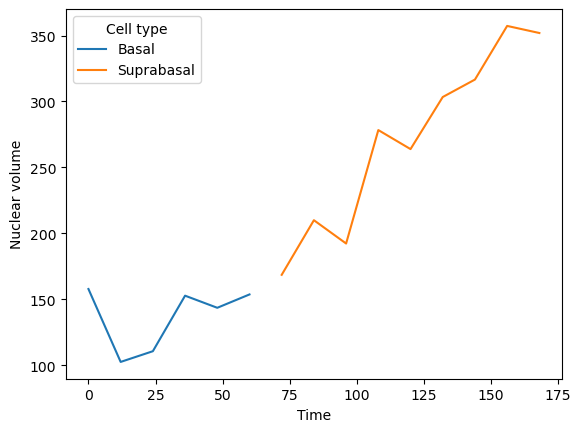

In [181]:
plot_cell(tracks['R1_557'],y='Nuclear volume')

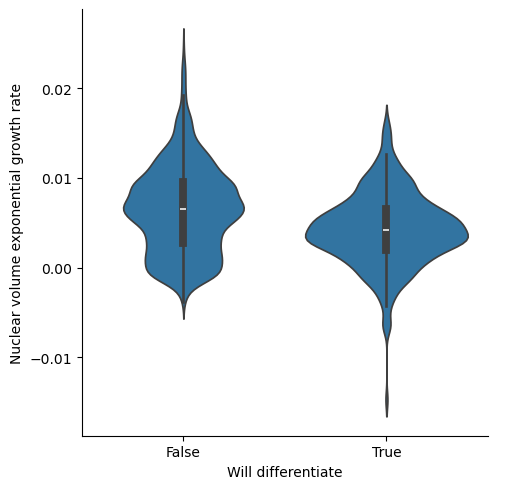

In [212]:
# sb.scatterplot(basals_g1.droplevel(axis=1,level=1),x='Cell volume smoothed',y='Cell volume smoothed growth rate',
#           hue='Will differentiate',alpha=0.1)
# from basicUtils import plot_bin_means
# plot_bin_means(

# plt.ylim([-15,30])
sb.catplot(basals_g1.droplevel(axis=1,level=1),x='Will differentiate',y='Nuclear volume exponential growth rate',kind='violin')


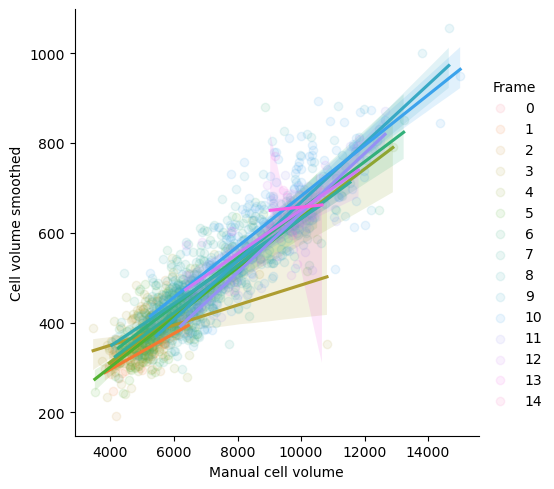

/var/folders/zp/5k1kvm9j0t19cvq8h628kr8h0000gn/T/ipykernel_52751/1031131363.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  will_divide['Cell volume smoothed','Measurement'] = will_divide['Manual cell volume','Measurement'].astype(float)
/var/folders/zp/5k1kvm9j0t19cvq8h628kr8h0000gn/T/ipykernel_52751/1031131363.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  will_divide['Cell cycle phase','Meta'] = will_divide['Cell cycle phase','Meta'].astype(str)
/var/folders/zp/5k1kvm9j0t19cvq8h628kr8h0000gn/T/i

<Axes: xlabel='Cell volume smoothed', ylabel='SG2'>

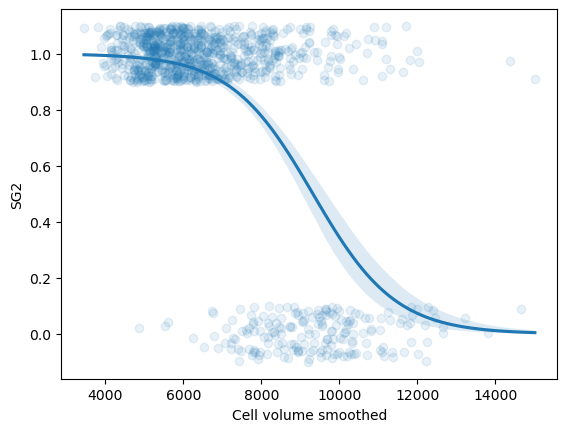

In [201]:
basals_known_phase = basals[basals['Cell cycle phase','Meta'] != 'NA']
will_divide = basals_known_phase[basals_known_phase['Will divide','Meta'] > 0]

will_divide['Cell volume smoothed','Measurement'] = will_divide['Manual cell volume','Measurement'].astype(float)
will_divide['Cell cycle phase','Meta'] = will_divide['Cell cycle phase','Meta'].astype(str)
will_divide['SG2','Meta'] = will_divide['Cell cycle phase','Meta'] == 'G1'

sb.regplot(will_divide.droplevel(axis=1,level=1),
           y='SG2',
           x='Cell volume smoothed',
        logistic=True,y_jitter=0.1, scatter_kws={'alpha':0.1})

# will_divide['Cell volume smoothed','Measurement']

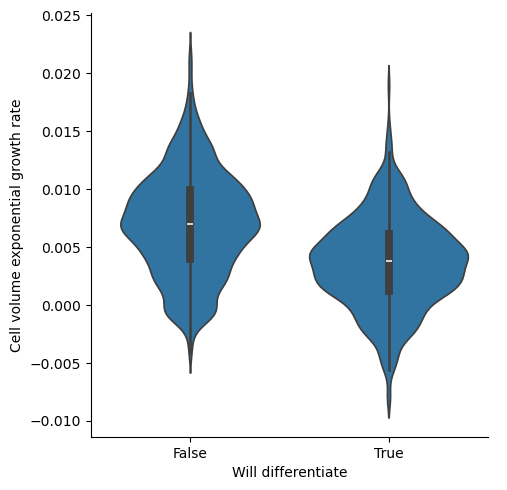

In [174]:
all_df

Name          Nuclear volume Nuclear solidity           Z           Y  \
Metadata         Measurement      Measurement Measurement Measurement   
Frame TrackID                                                           
0     R1_1          122.9375         0.866902   41.884596    2.028470   
      R1_2          161.5000         0.879211   44.198142  106.386223   
      R1_5          209.8750         0.911509   44.379690   77.545861   
      R1_8          117.9375         0.864011   51.314785   40.352146   
      R1_11         109.1875         0.854279   44.419576  101.957928   
...                      ...              ...         ...         ...   
14    R2_1163       209.8125         0.929402   28.423295   21.360292   
      R2_1173       151.6875         0.889011   51.502266    7.801813   
      R2_1175       148.6875         0.886694   40.998739  111.633775   
      R2_1193       164.7500         0.800729   29.150607   61.828907   
      R2_1198       295.5000         0.857609   24.438240   47.262162   

Name                    X Nuclear height Cell volume      Z-cyto      Y-cyto  \
Metadata      Measurement    Measurement Measurement Measurement Measurement   
Frame TrackID                                                                  
0     R1_1      72.736528          -11.0         NaN         NaN         NaN   
      R1_2      39.835913          -13.0    477.0625   43.777545  106.461254   
      R1_5      97.643389          -13.0    605.9375   44.146983   77.666220   
      R1_8       2.084393          -10.0         NaN         NaN         NaN   
      R1_11     35.727962          -10.0    444.2500   44.279122  102.201604   
...                   ...            ...         ...         ...         ...   
14    R2_1163   69.000894           -4.0         NaN         NaN         NaN   
      R2_1173  101.053564          -12.0    523.6875   51.111350    7.415831   
      R2_1175   30.501156           -6.0         NaN         NaN         NaN   
      R2_1193    6.915781           -4.0         NaN         NaN         NaN   
      R2_1198   93.963357           -7.0         NaN         NaN         NaN   

Name               X-cyto  ... Num neighbor division 1 frame prior  \
Metadata      Measurement  ...                         Measurement   
Frame TrackID              ...                                       
0     R1_1            NaN  ...                                 NaN   
      R1_2      40.170935  ...                                 NaN   
      R1_5      97.823672  ...                                 NaN   
      R1_8            NaN  ...                                 NaN   
      R1_11     35.926210  ...                                 NaN   
...                   ...  ...                                 ...   
14    R2_1163         NaN  ...                                 NaN   
      R2_1173  101.164966  ...                                 NaN   
      R2_1175         NaN  ...                                 NaN   
      R2_1193         NaN  ...                                 NaN   
      R2_1198         NaN  ...                                 NaN   

Name          Num neighbor delamination 1 frame prior  \
Metadata                                  Measurement   
Frame TrackID                                           
0     R1_1                                        NaN   
      R1_2                                        NaN   
      R1_5                                        NaN   
      R1_8                                        NaN   
      R1_11                                       NaN   
...                                               ...   
14    R2_1163                                     NaN   
      R2_1173                                     NaN   
      R2_1175                                     NaN   
      R2_1193                                     NaN   
      R2_1198                                     NaN   

Name          Num daughter differentiated  \
Metadata                       